# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

# Dataset Analysis

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
np.unique(data['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Check if there are empty cells
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualization

<Axes: xlabel='Species', ylabel='count'>

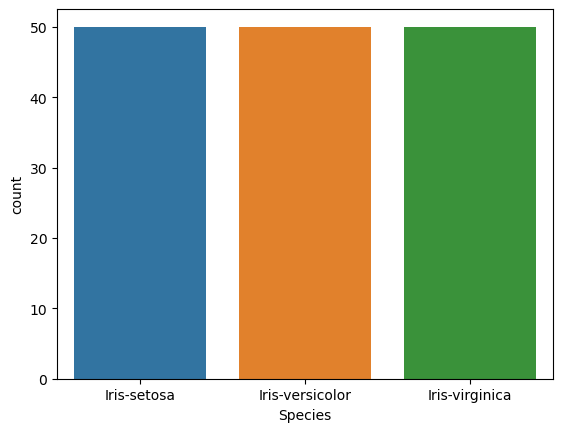

In [8]:
sns.countplot(data = data, x = 'Species', order = data['Species'].value_counts().index)

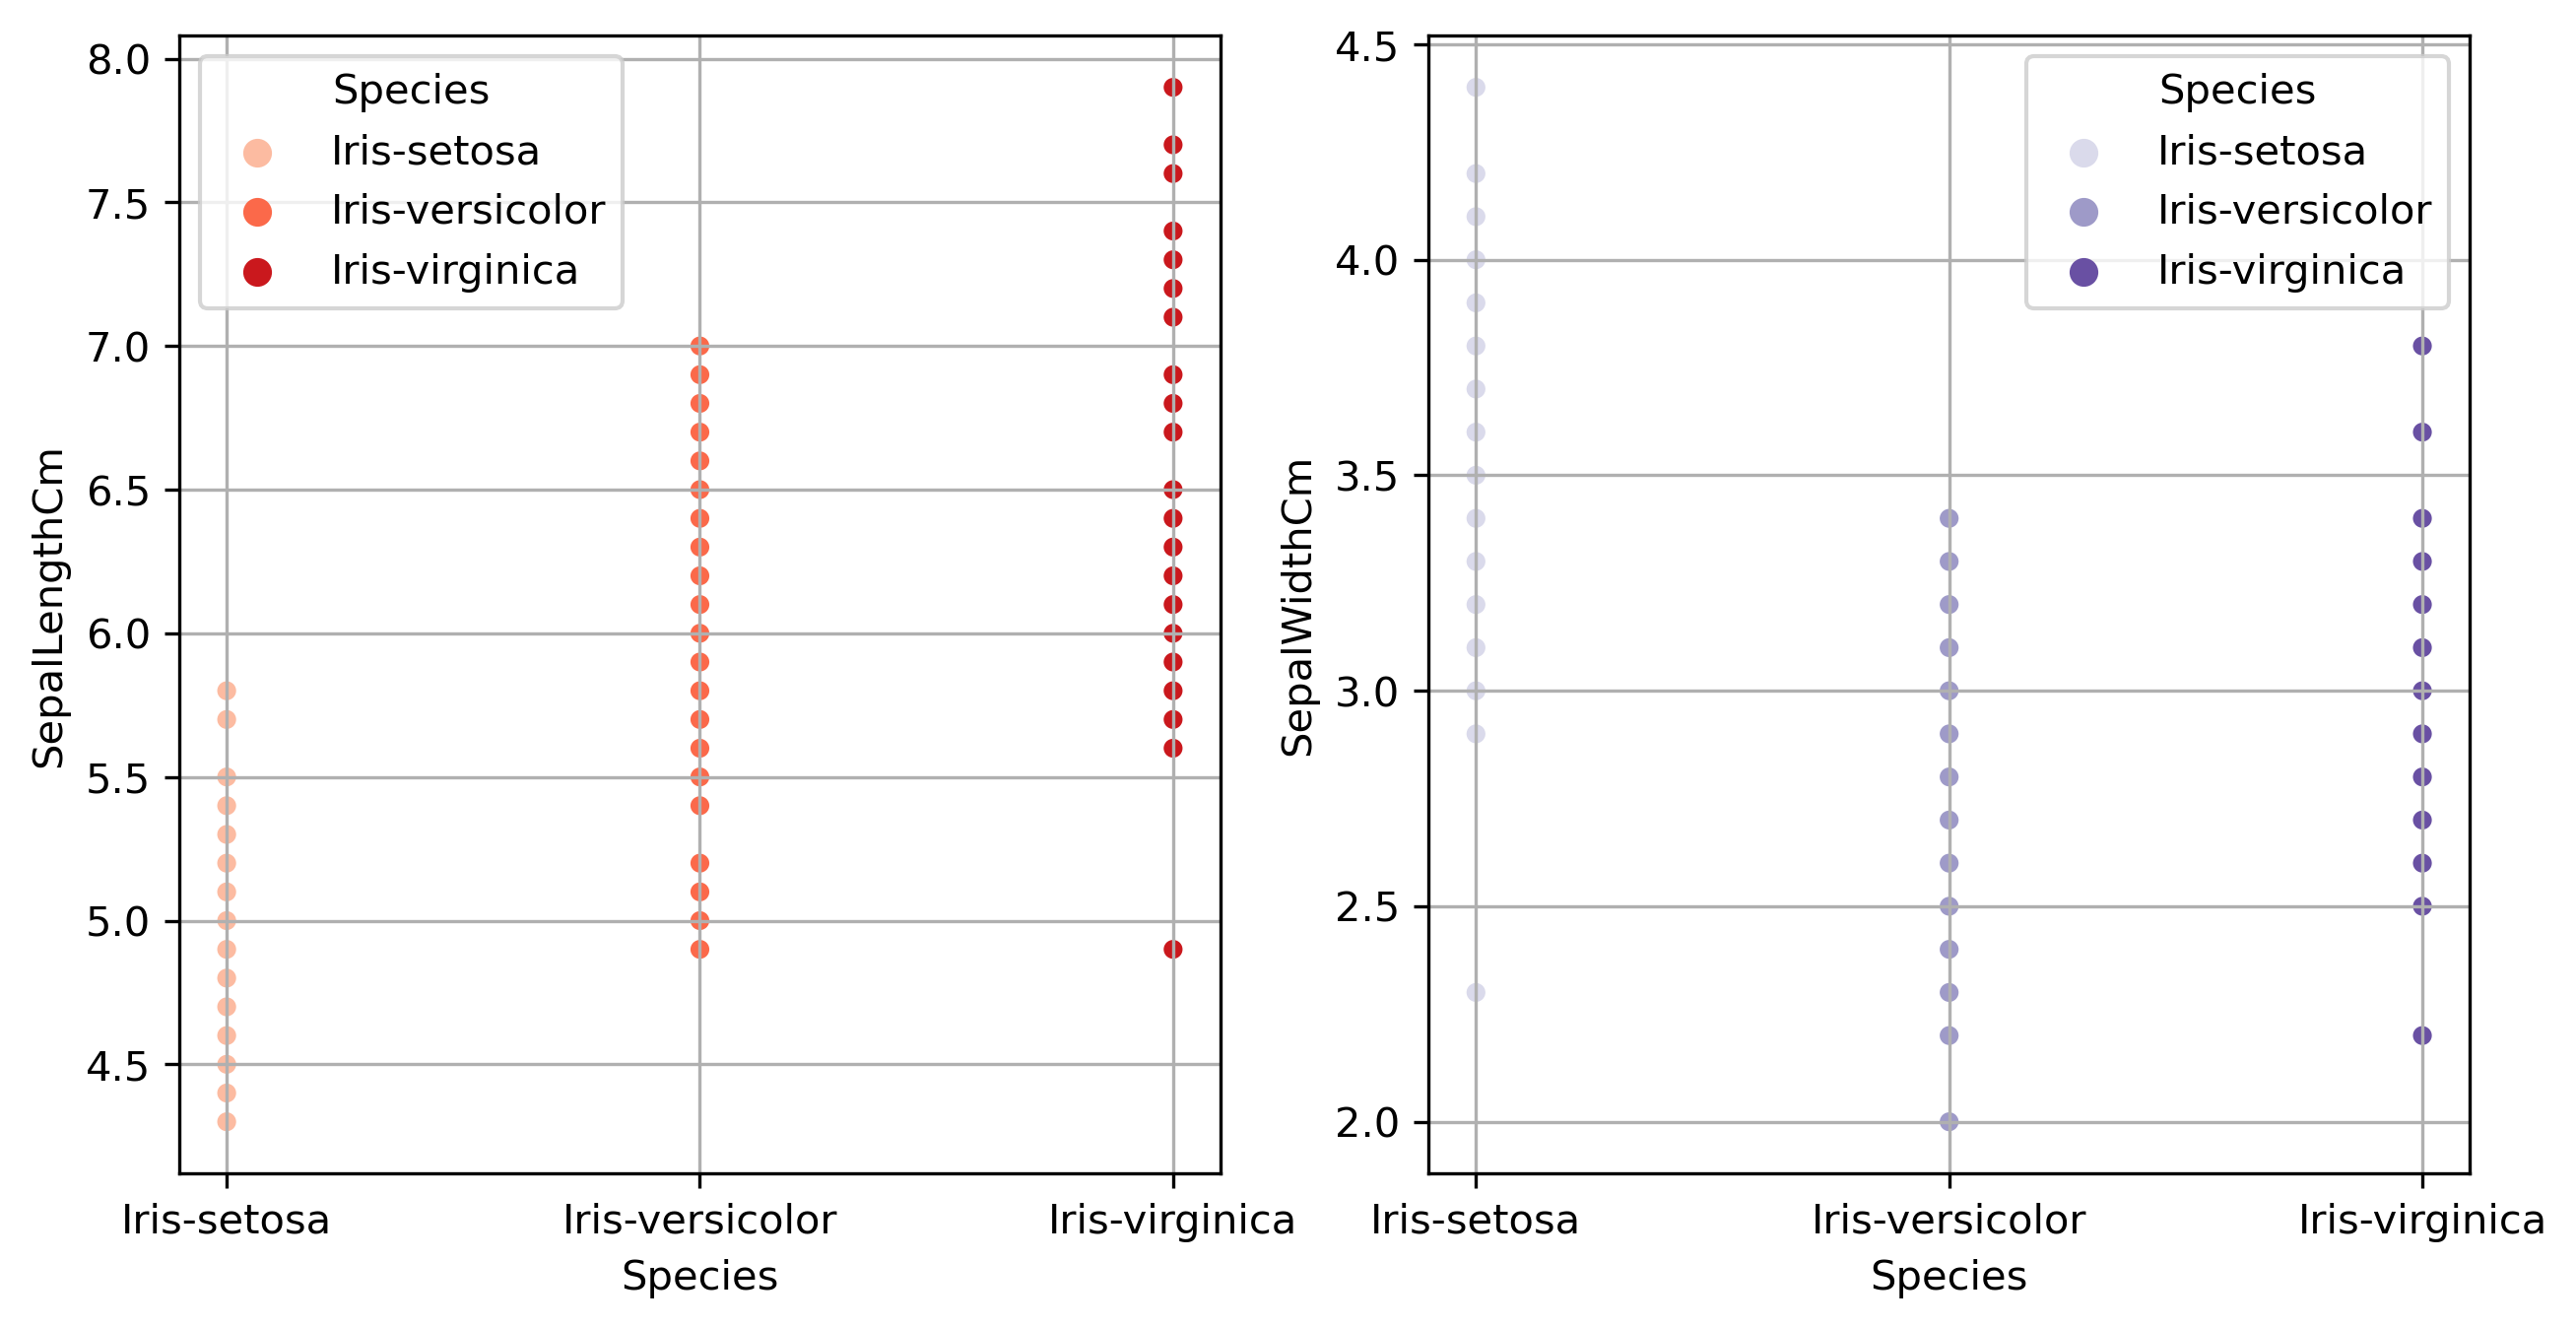

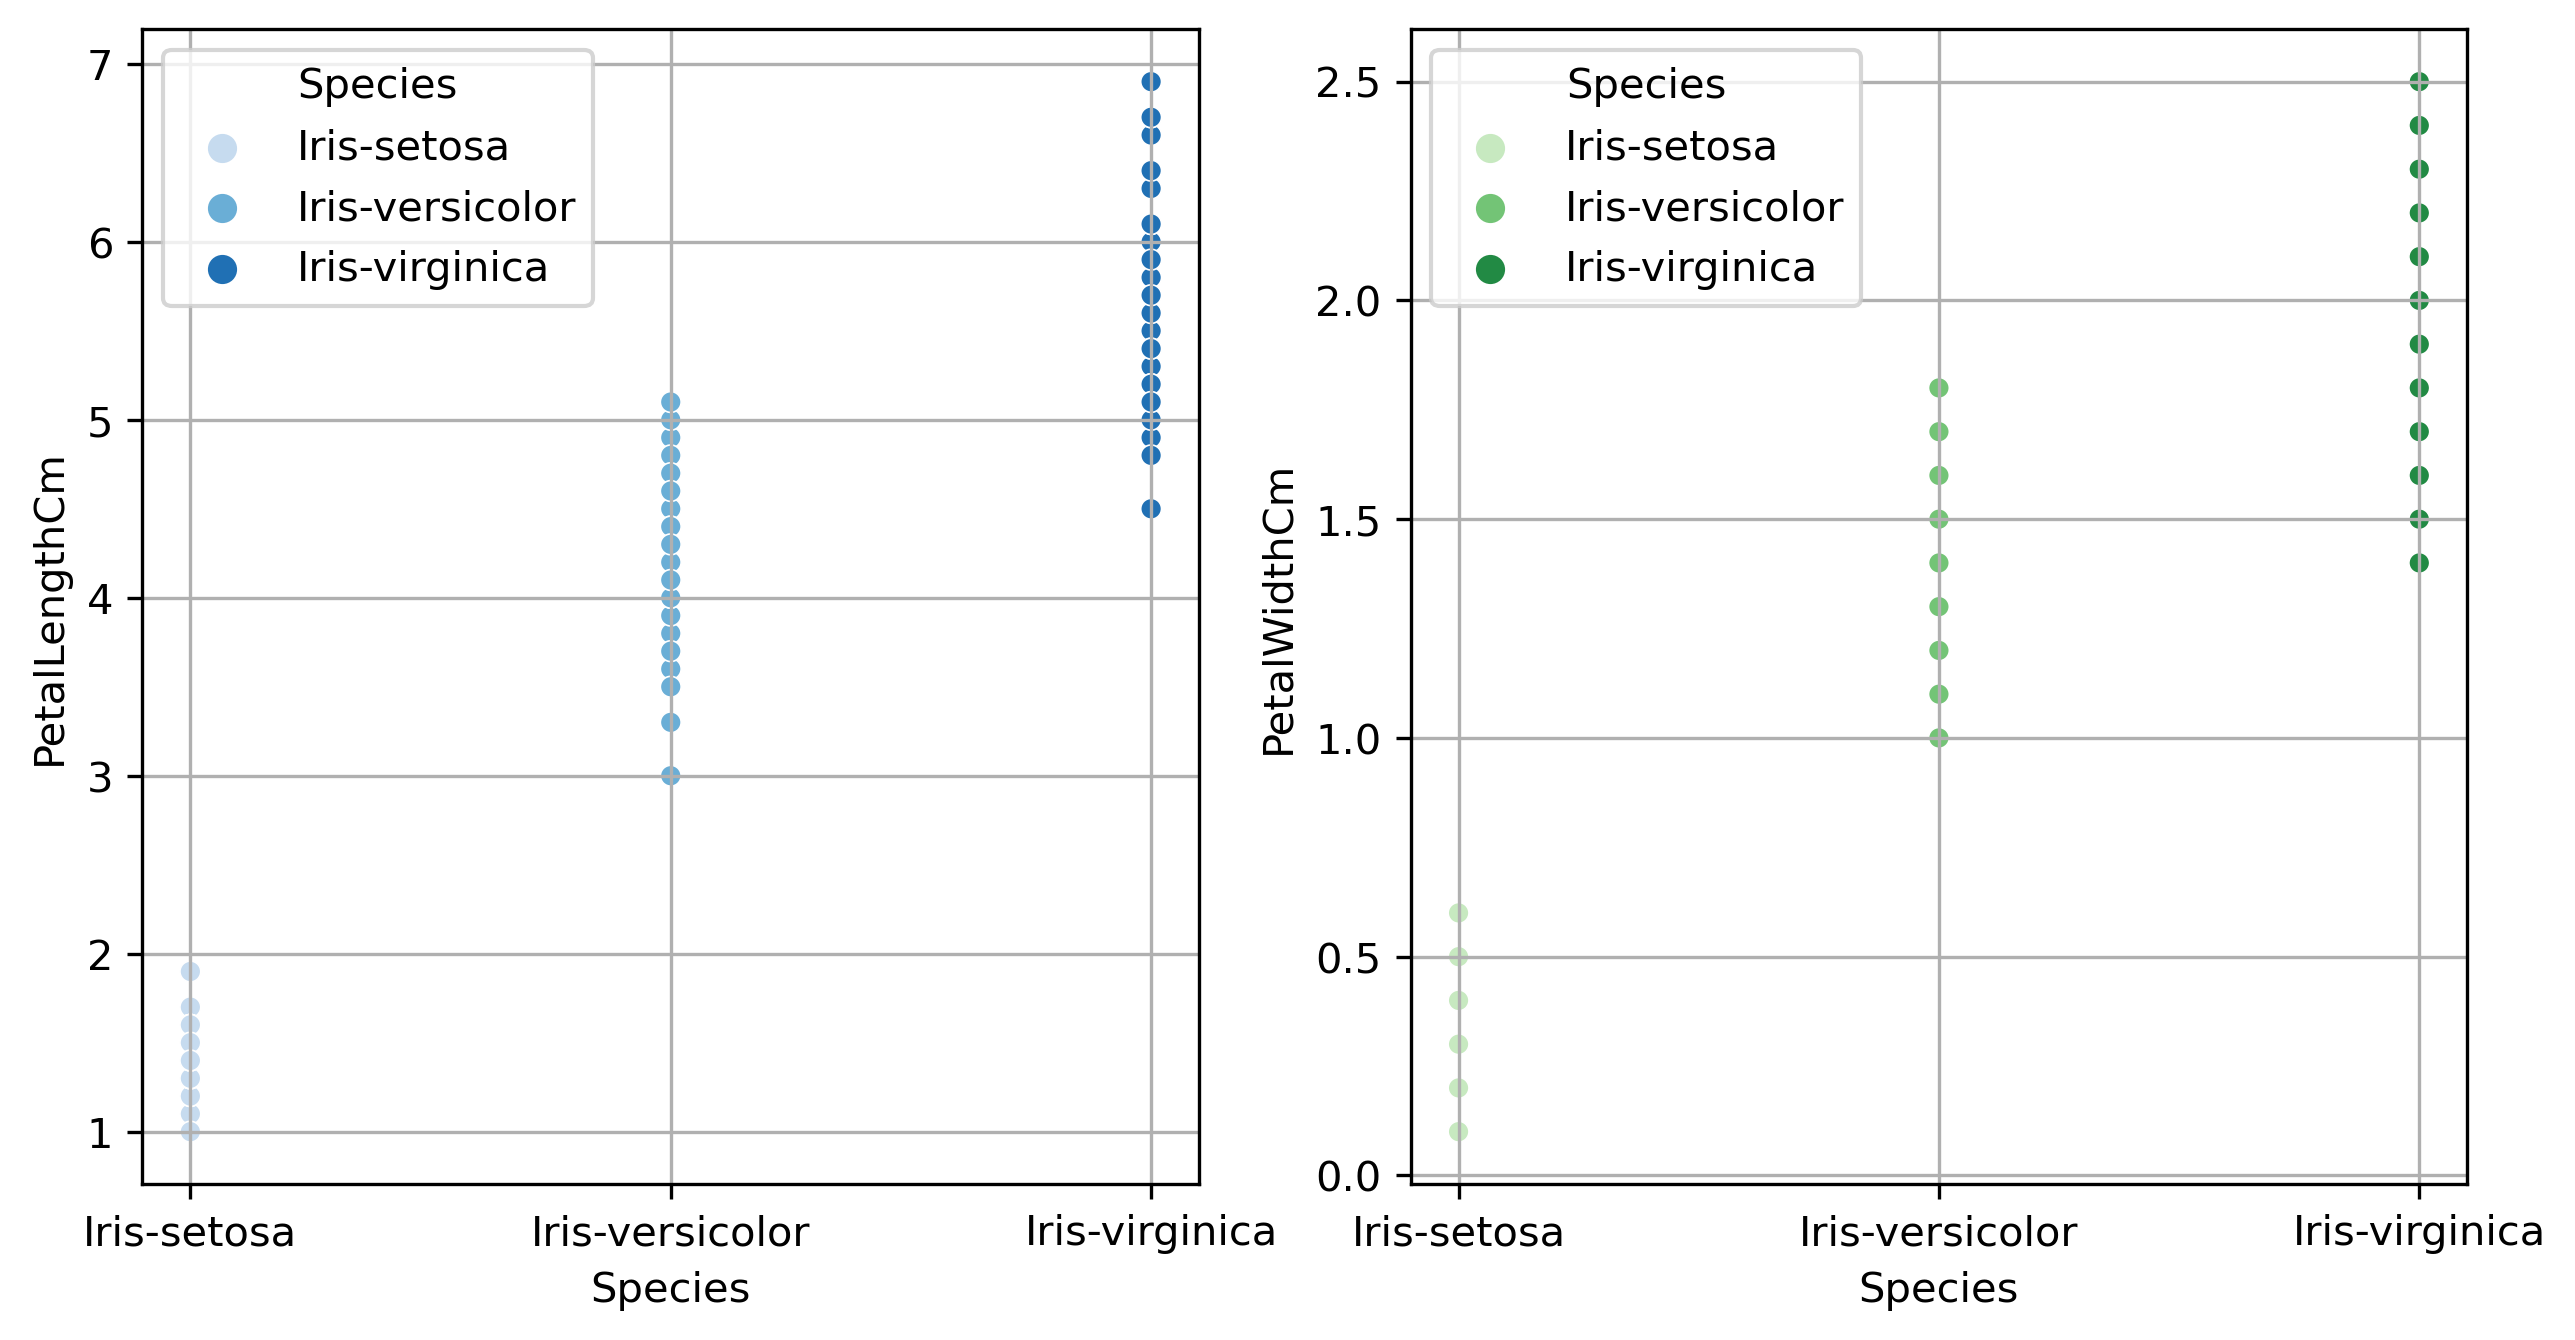

In [9]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(10, 5), dpi=300)

sns.scatterplot(x = 'Species', y = 'SepalLengthCm', data = data, hue = 'Species', palette = 'Reds', s = 25, ax=axs[0])
axs[0].grid()

sns.scatterplot(x = 'Species', y = 'SepalWidthCm', data = data, hue = 'Species', palette = 'Purples', s = 25, ax=axs[1])
axs[1].grid()

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(10, 5), dpi=300)

sns.scatterplot(x = 'Species', y = 'PetalLengthCm', data = data, hue = 'Species', palette = 'Blues', s = 25, ax=axs[0])
axs[0].grid()

sns.scatterplot(x = 'Species', y = 'PetalWidthCm', data = data, hue = 'Species', palette = 'Greens', s = 25, ax=axs[1])
axs[1].grid()

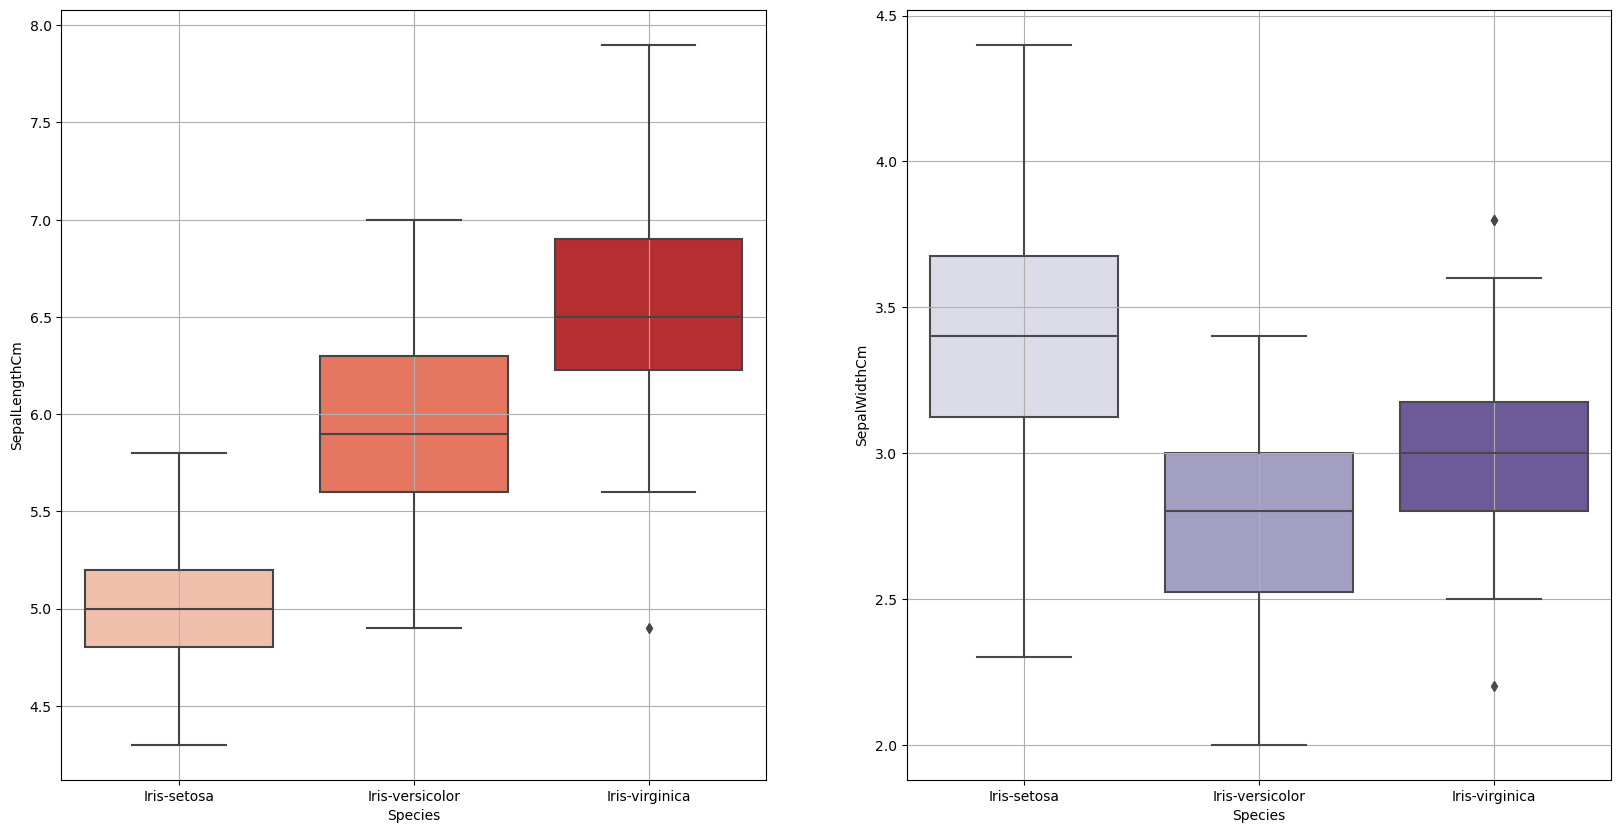

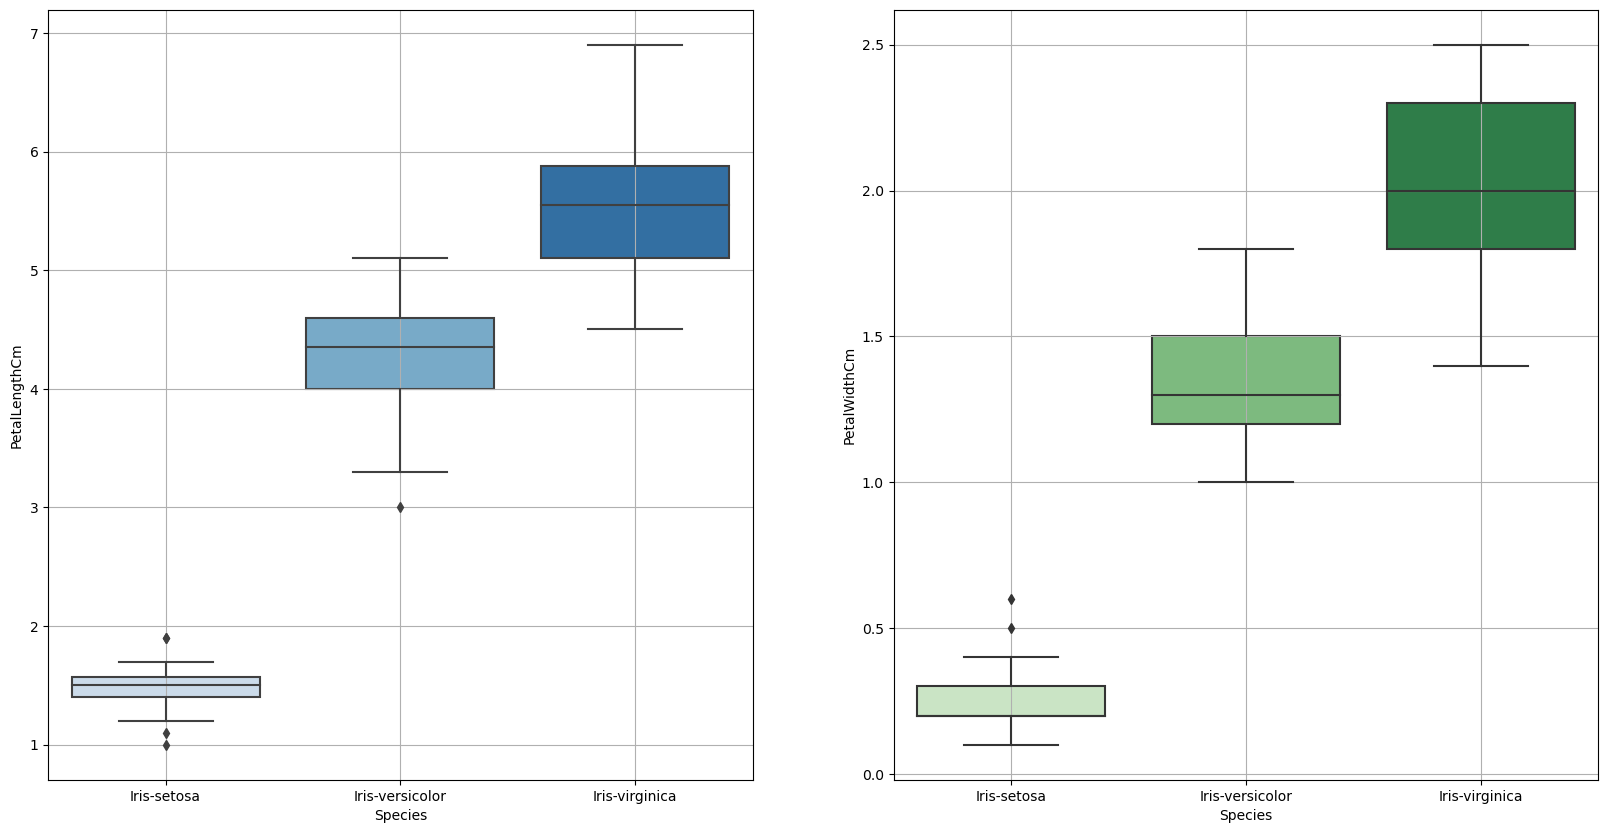

In [10]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(20, 10))

sns.boxplot(x = data['Species'], y = data['SepalLengthCm'], palette = 'Reds', ax = axs[0])
axs[0].grid()

sns.boxplot(x = data['Species'], y = data['SepalWidthCm'], palette = 'Purples', ax = axs[1])
axs[1].grid()

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(20, 10))

sns.boxplot(x = data['Species'], y = data['PetalLengthCm'], palette = 'Blues', ax = axs[0])
axs[0].grid()

sns.boxplot(x = data['Species'], y = data['PetalWidthCm'], palette = 'Greens', ax = axs[1])
axs[1].grid()

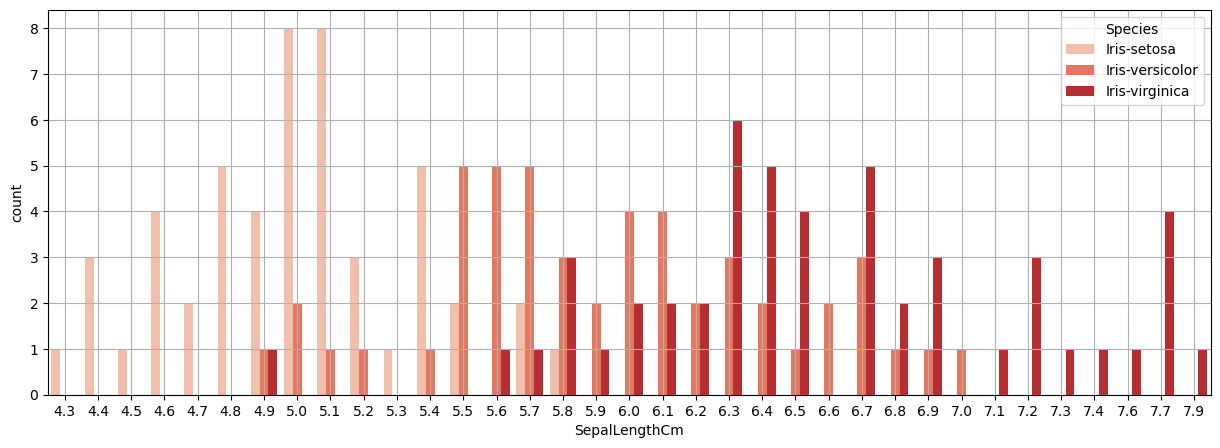

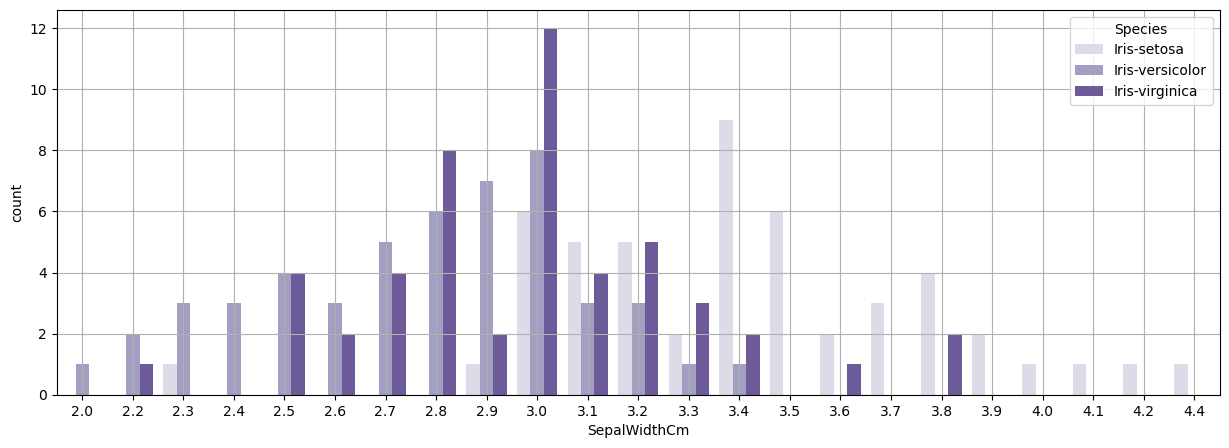

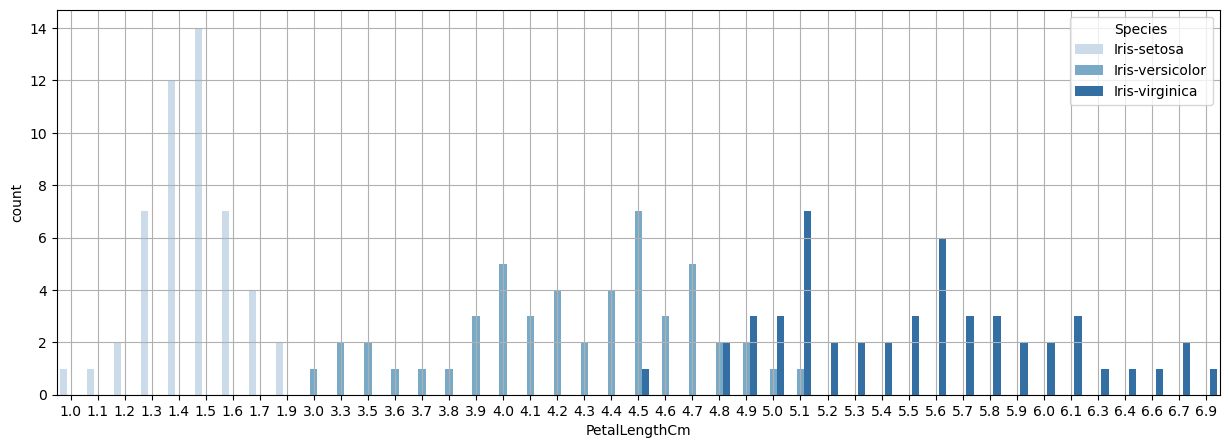

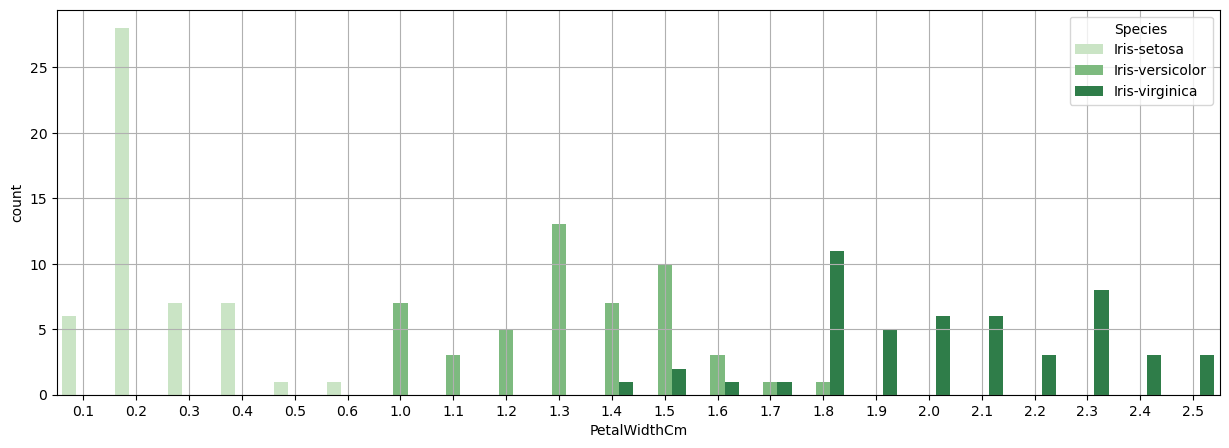

In [11]:
plt.figure(figsize = (15,5))
sns.countplot(data = data, x = data['SepalLengthCm'], hue = data['Species'], palette = 'Reds')
plt.grid()

plt.figure(figsize = (15,5))
sns.countplot(data = data, x= data['SepalWidthCm'], hue = data['Species'], palette = 'Purples')
plt.grid()

plt.figure(figsize = (15,5))
sns.countplot(data = data, x = data['PetalLengthCm'], hue = data['Species'], palette = 'Blues')
plt.grid()

plt.figure(figsize = (15,5))
sns.countplot(data = data, x = data['PetalWidthCm'], hue = data['Species'], palette = 'Greens')
plt.grid()

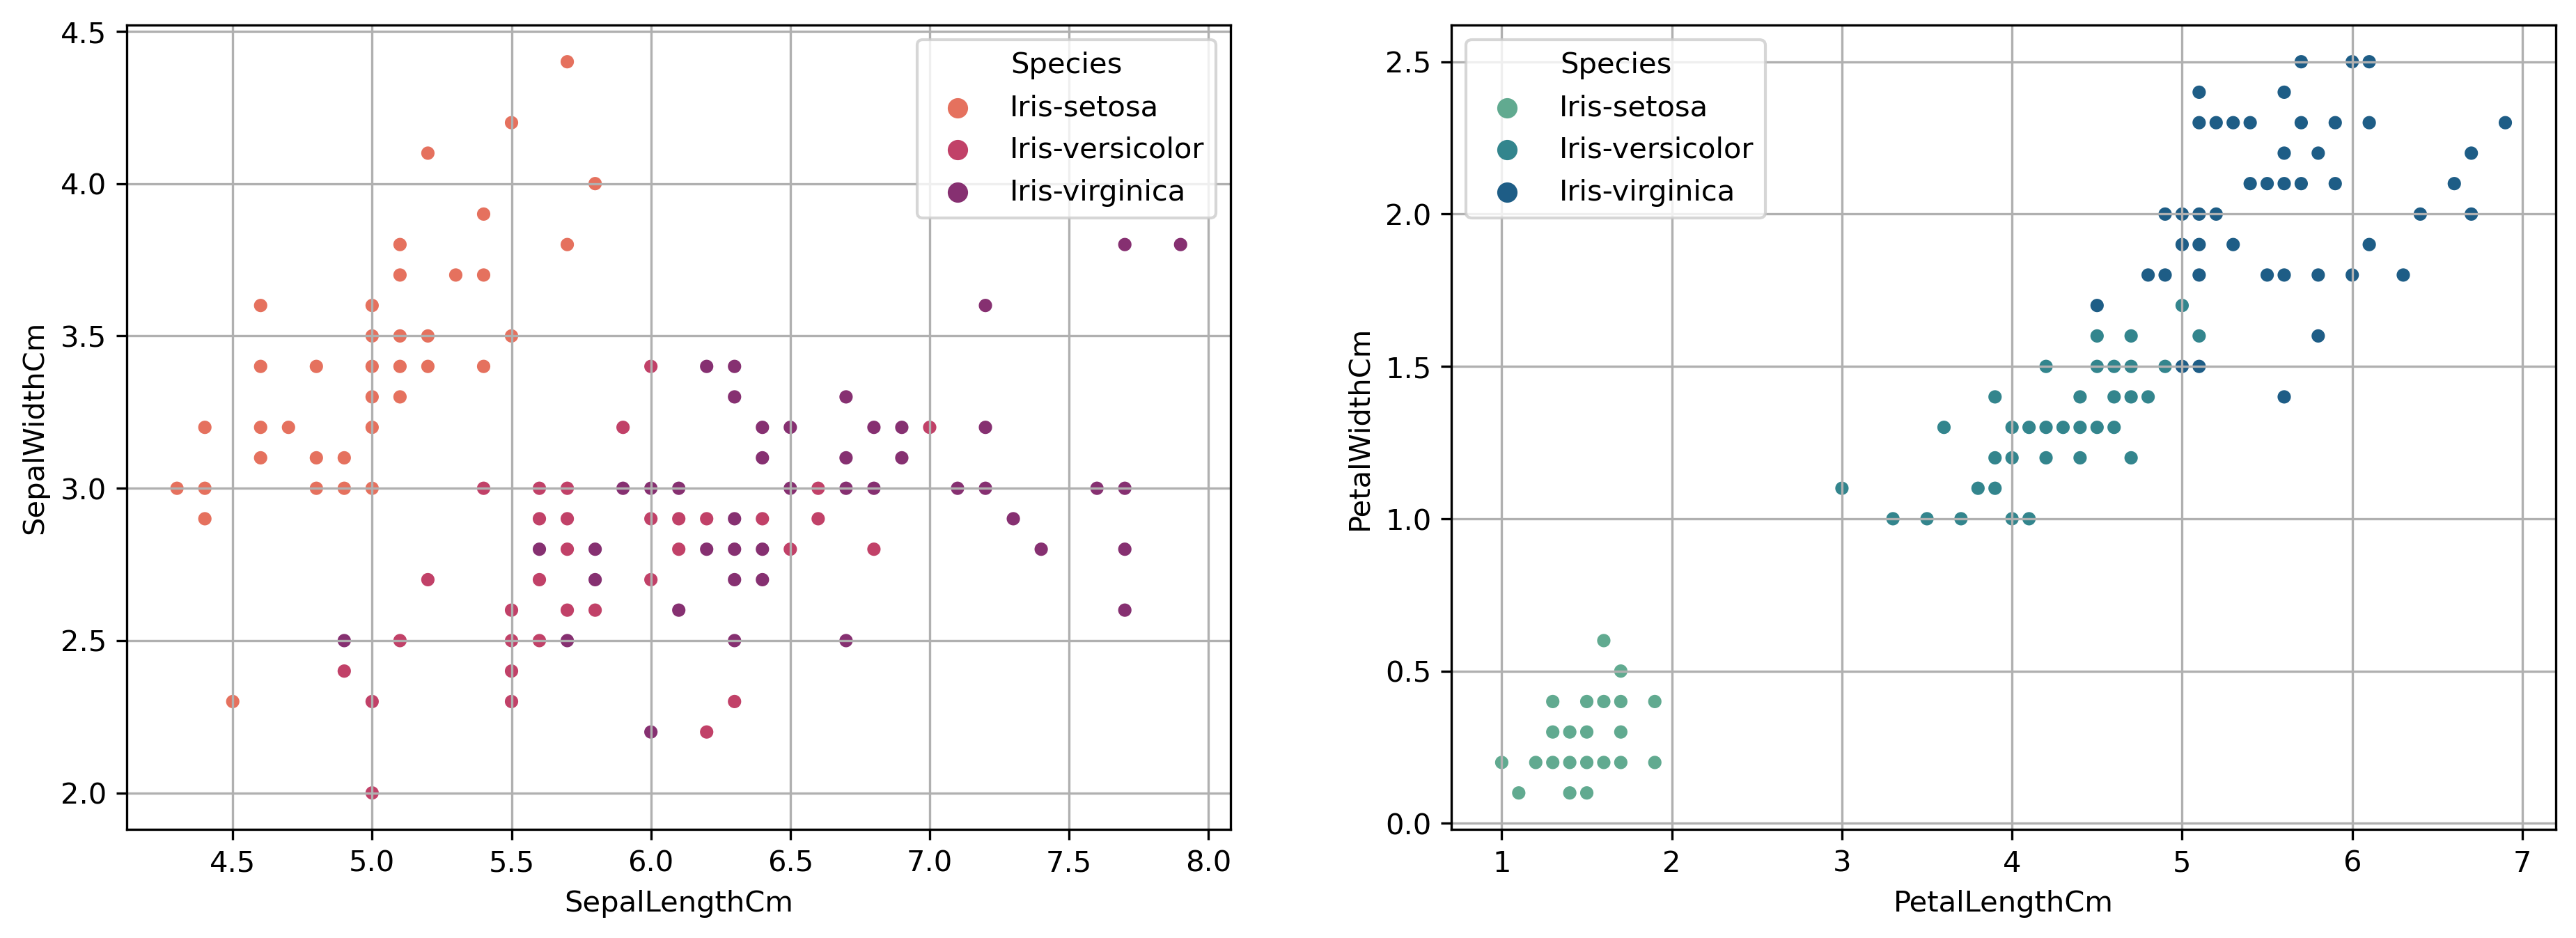

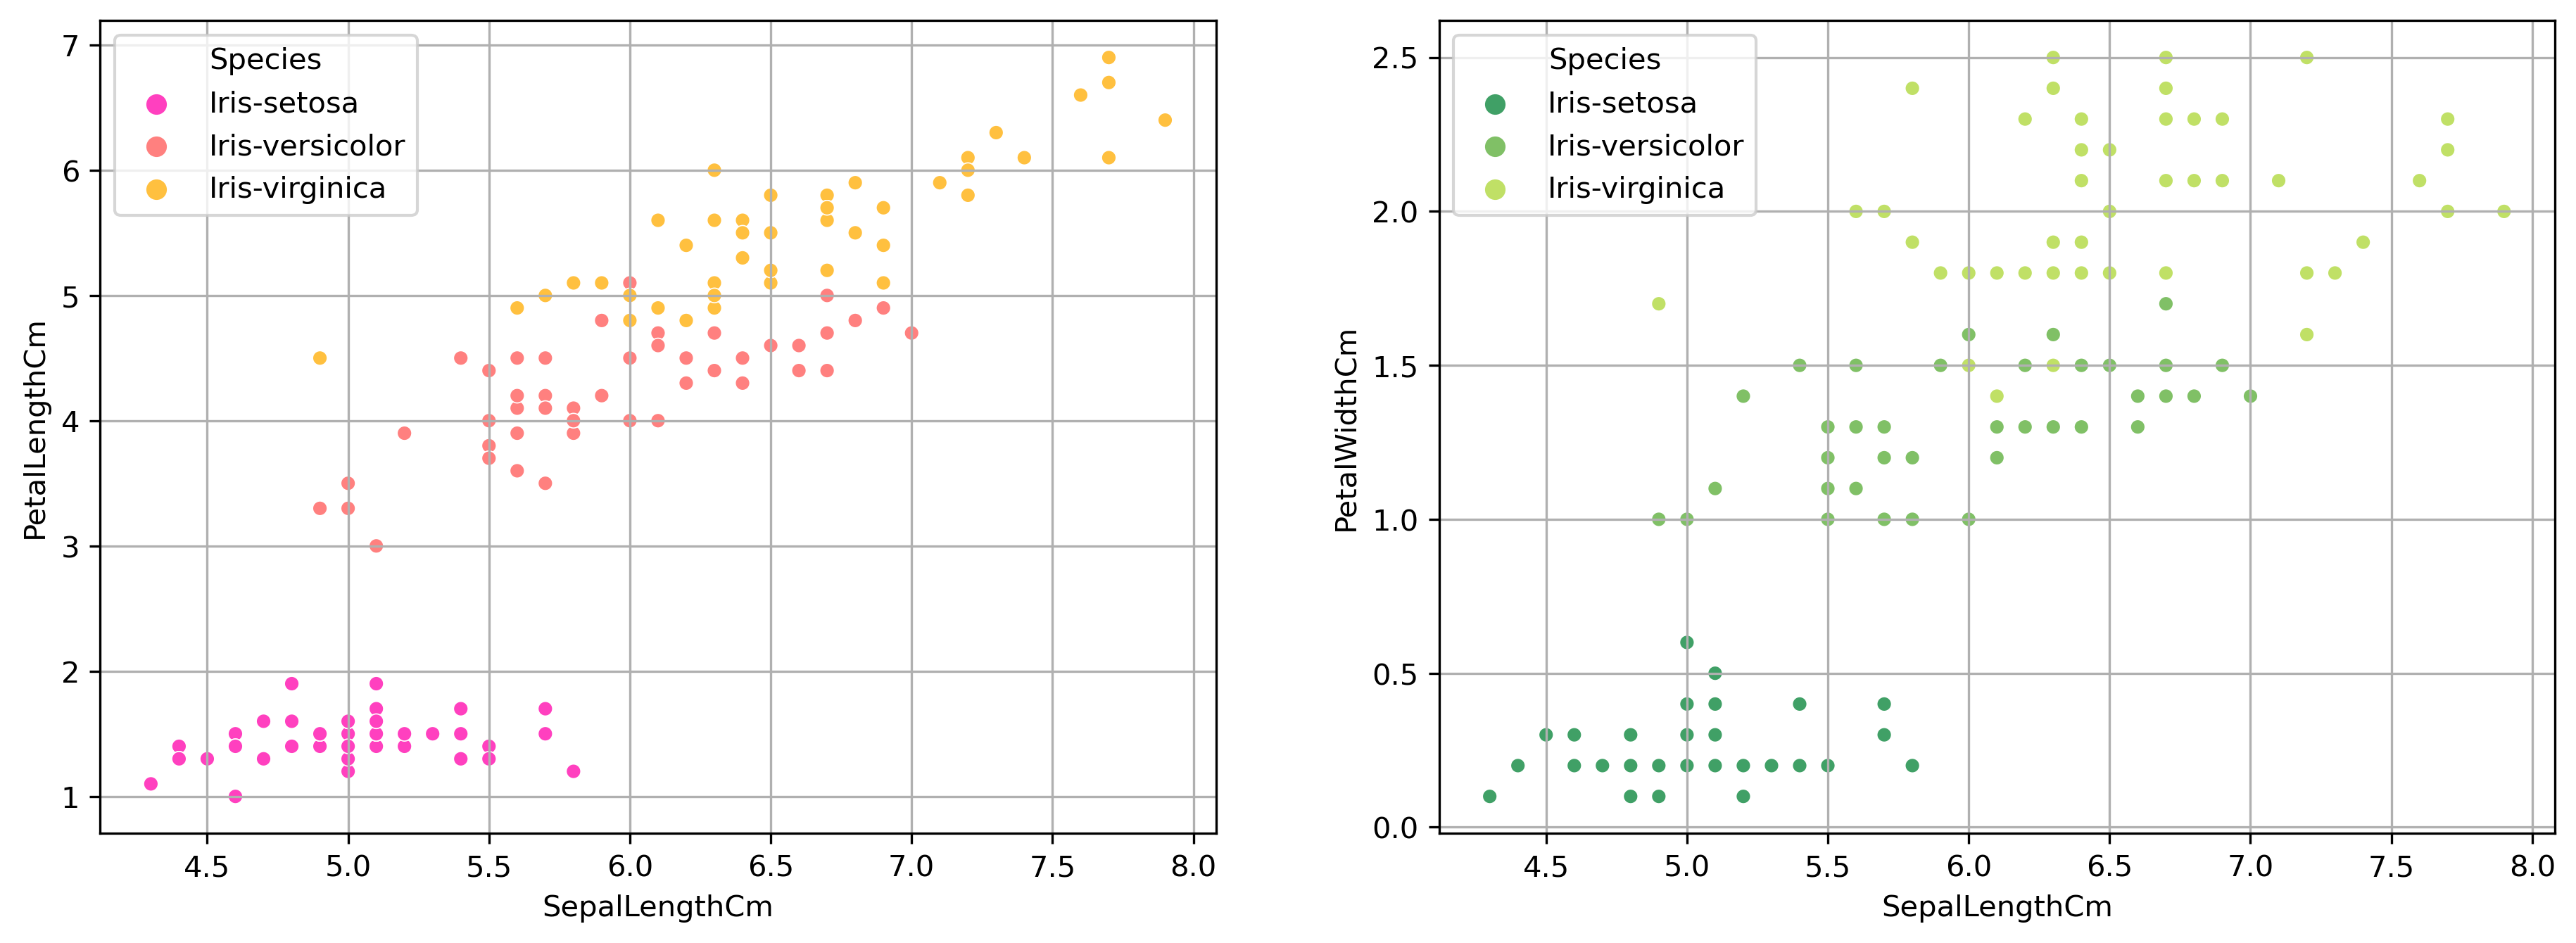

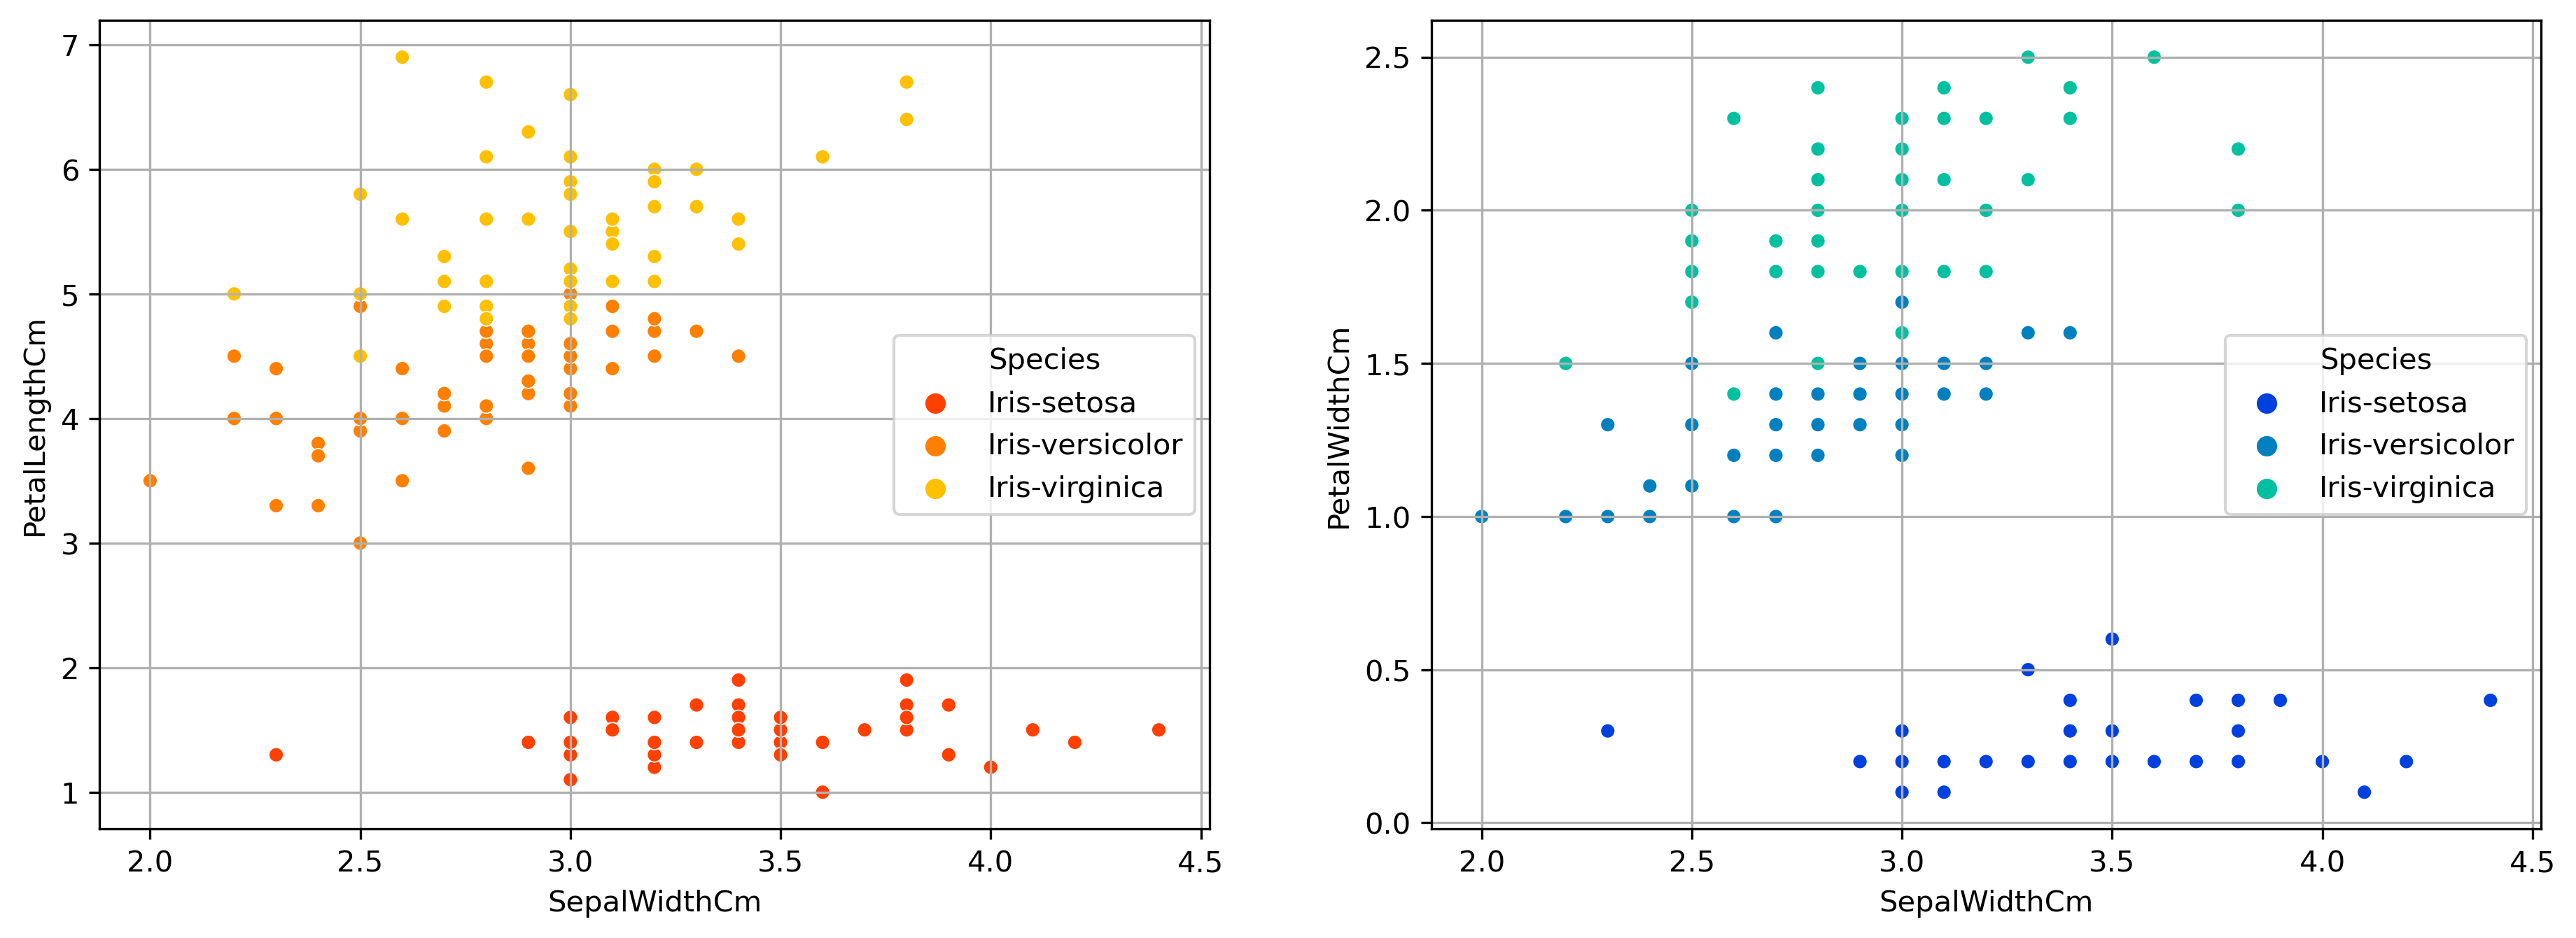

In [12]:
fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(15, 5), dpi=300)

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, hue = 'Species', palette = 'flare', s = 25, ax=axs[0])
axs[0].grid()

sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data, hue = 'Species', palette = 'crest', s = 25, ax=axs[1])
axs[1].grid()

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(15, 5), dpi=300)

sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = data, hue = 'Species', palette = 'spring', s = 25, ax=axs[0])
axs[0].grid()

sns.scatterplot(x = 'SepalLengthCm', y = 'PetalWidthCm', data = data, hue = 'Species', palette = 'summer', s = 25, ax=axs[1])
axs[1].grid()

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(15, 5), dpi=300)

sns.scatterplot(x = 'SepalWidthCm', y = 'PetalLengthCm', data = data, hue = 'Species', palette = 'autumn', s = 25, ax=axs[0])
axs[0].grid()

sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm', data = data, hue = 'Species', palette = 'winter', s = 25, ax=axs[1])
axs[1].grid()

# Data Preprocessing

In [13]:
# Drop Id column
data = data.drop(['Id'], axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Convert data labels in species column from (setosa, versicolor & virginica) into (0, 1 & 2)
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
np.unique(data['Species'])

array([0, 1, 2])

In [16]:
# Correlation between features
corr=data.corr()
corr.style.background_gradient()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [17]:
# Input features
X = data.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Output labels
y = data['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# Split Dataset

In [19]:
# Dataset is divided into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True , random_state = 42, stratify = y)

# Shape of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# K-Nearest Neighbor

In [20]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 10)

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    # Fit the model on training data
    knn.fit(X_train, y_train)
    # Compute accuracy for the training and testing datasets
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Compare the accurcies for the train and test data for each number of neighbors
pd.DataFrame({"Train" : train_accuracies, "Test" : test_accuracies})

,Train,Test
1,1.000000,0.966667
2,0.975000,0.933333
3,0.958333,1.000000
4,0.958333,1.000000
5,0.966667,1.000000
6,0.966667,0.966667
7,0.975000,0.966667
8,0.975000,0.966667
9,0.975000,1.000000


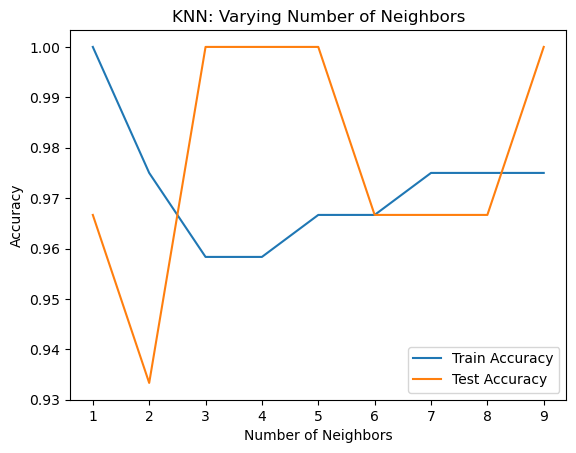

In [21]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Train Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [22]:
# Set the number of neighbors to 9
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
Knn_pred = knn.predict(X_test)

# Model Evaluation

In [23]:
def performance(y_test, y_pred):
    print("Model Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
    print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = ".2f", xticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label", fontsize = 15)
    plt.ylabel("Actual Label", fontsize = 15)

Model Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



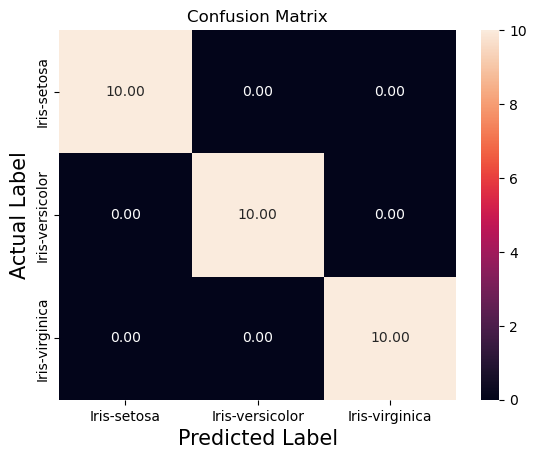

In [24]:
performance(y_test, Knn_pred)